# Resampling Datetime Data

- Robert Yonce
- 6/5/23

# Part 1

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib import dates as mdates

url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Datetime Change and Index

In [2]:
# Change the Date to datetime

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Checking to see the change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [4]:
# Set date to index

df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Filter Out Data

In [5]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Missing Values

In [6]:
# Finding missing values

df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
# Interpolating temperature measures

df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [8]:
# Filling preciptation and snow with 0

df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [9]:
# Check missing values after filling in

df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2

## Question 1

- Q1: What month had the most precipitation between 2000 through 2010?

In [10]:
# Different dataframe

df_month = df.resample('MS').sum()
df_month = df_month.loc['2000': '2010']
df_month

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,14.3,174.05,82.10,262.95,0.0
2000-02-01,62.2,208.25,113.20,298.50,0.0
2000-03-01,13.4,263.25,151.65,377.45,0.0
2000-04-01,71.8,269.90,158.25,394.85,0.0
2000-05-01,68.4,427.75,295.40,556.30,0.0
...,...,...,...,...,...
2010-08-01,83.8,542.05,413.25,669.20,0.0
2010-09-01,38.0,462.20,340.50,578.35,0.0
2010-10-01,61.0,367.35,263.35,467.30,0.0


In [11]:
# Max precipitation of month

maxp = df_month['precipitation'].idxmax()
maxp

Timestamp('2009-11-01 00:00:00', freq='MS')

In [12]:
# Max value

prec = df_month['precipitation'].max()
prec = round(prec, 2)
prec

138.4

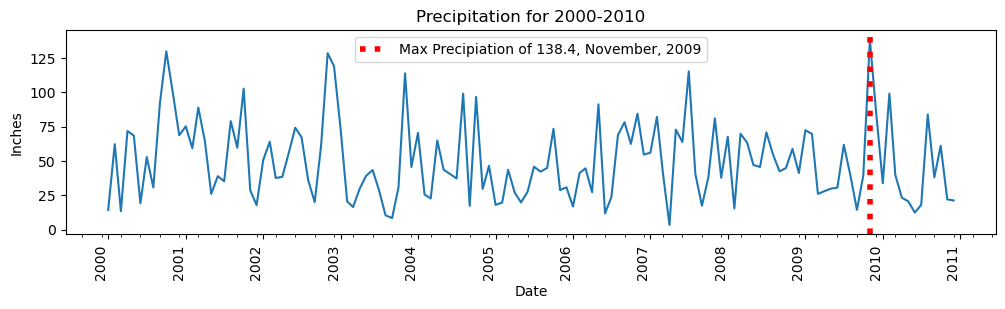

In [13]:
# Graph with line of max precipitation

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(df_month['precipitation'])
ax.set(title='Precipitation for 2000-2010', xlabel = 'Date', ylabel='Inches')

# customize major ticks

major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)

fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(x = maxp , color='red',lw=4, ls=':', 
           label= f'Max Precipiation of {prec}, {maxp.strftime("%B, %Y")}')
ax.legend();

## Question 2

- Q2: Which year between 2000-2020 had the coolest average temperature?

In [14]:
# Different dataframe

df_year = df.resample('Y').mean()
df_year = df_year.loc['2000': '2020']
df_year

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,1.974863,11.575683,8.001503,15.144672,0.008197
2001-12-31,1.850411,11.331507,7.647397,15.036575,0.000000
2002-12-31,2.060000,12.084247,8.425890,15.815205,0.000000
2003-12-31,1.261096,12.114521,7.895890,16.360274,0.024658
2004-12-31,1.622131,11.900683,8.234563,15.549044,0.005464
2005-12-31,1.155068,11.822877,7.973562,15.676849,0.008219
2006-12-31,1.656986,12.290822,8.506301,16.152055,0.000000
2007-12-31,1.778356,11.944384,8.120137,15.814932,0.016438
2008-12-31,1.698361,11.326776,7.568852,15.156831,0.010929


In [15]:
# Lowest mean year

min_temp = df_year['min_temp'].idxmin()
min_temp

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [16]:
# Lowest value

temp = df_year['min_temp'].min()
temp = round(temp, 2)
temp

6.8

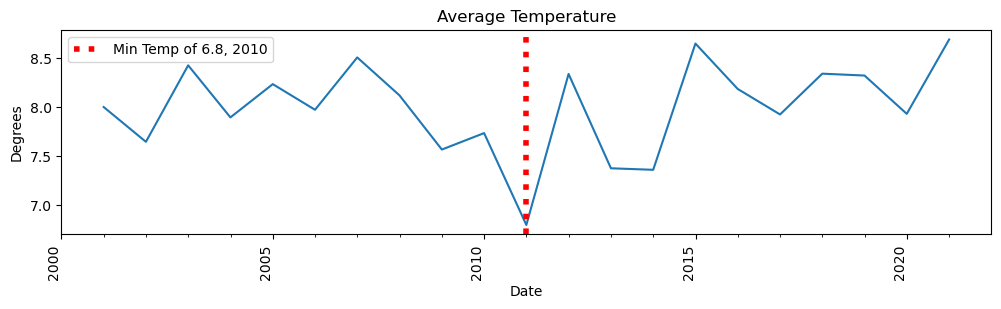

In [18]:
# Graph with lowest mean line

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(df_year['min_temp'])
ax.set(title='Average Temperature', xlabel = 'Date', ylabel='Degrees')

# customize major ticks

major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

minor_loc =  mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)

fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(x = min_temp , color='red',lw=4, ls=':', 
           label= f'Min Temp of {temp}, {min_temp.strftime("%Y")}')
ax.legend();